# <span style="color:green">Application of Machine Learning Techniques in Predicting Properties of Stainless Steel</span>
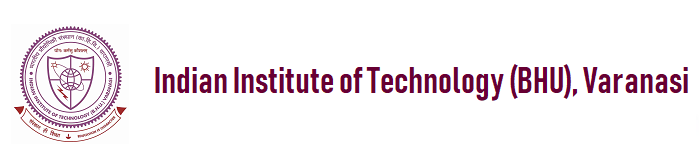
<h1><center><span style="color:red">F M Ayub Khan, M.Tech (Alloy Technology) </span> </center></h1> </span><h1><center><span 

# 1. Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
Data=pd.read_csv('../input/tensile/thesis1.csv')
pd.set_option('display.max_columns', None)


In [ ]:
Data.head()

# 2.Exploratory Data Analysis

In [ ]:
Data.describe()

In [ ]:
Data['Sample thk (mm)'].idxmax()

In [ ]:

Data.describe()

In [ ]:
Data.corr()

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(Data.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

#### Adding Grain Size to the dataset

In [ ]:
conditions = [
    (Data['Grade'] == 'JT'),
    (Data['Grade'] == 'JSLU DD'),
    (Data['Grade']== 'JSLU SD'),(Data['Grade']== '204CU')
    ]

# create a list of the values we want to assign for each condition
values = ['33','25','20','25']

# create a new column and use np.select to assign values to it using our lists as arguments
Data['Grain Size'] = np.select(conditions, values)


In [ ]:
# df=Data.loc[Data['Grade'] != '204CU']
df=Data

In [ ]:
df1=df.loc[df['Grade'] == '204CU']
df2=df.loc[df['Grade'] == 'JSLU SD']
df3=df.loc[df['Grade'] == 'JSLU DD']
df4=df.loc[df['Grade'] == 'JT']

In [ ]:
df.shape

In [ ]:
df.groupby('Grade').size()

In [ ]:
df.drop(['Condition','Finish', 'End Date','Work Center', 'Coil CutInst','O/P BATCH', 'MATERIAL CODE', 'Coil No.',
           'ID/OD','Hardness (HRB)', 'CRAP at','MF', 'Quality Plan', 'Origin','Quality Plan.1','Classification'],axis=1,inplace=True)

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(['Thk (mm)','Al%','Nb%','Co%','H(ppm)'],axis=1,inplace=True) # As these variables have lots of missing values

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

#### Checking for the strings

In [ ]:
df['El% on 50mm GL_Number'] = df['El% on 50mm GL'].str.replace('([A-Za-z]+)', '')
df['El% on 50mm GL_Letter'] = df['El% on 50mm GL'].str.extract('([A-Za-z]+)')

In [ ]:
to_drop=['El% on 50mm GL','El% on 50mm GL_Letter']
df.drop(to_drop,axis=1,inplace=True)


In [ ]:
df.groupby('Grade').size()

In [ ]:
df.replace(r'-', np.NaN, inplace=True)
df.replace(r'',np.NaN,inplace=True)
df.replace(r'*',np.NaN,inplace=True)
df.replace(r'&',np.NaN,inplace=True)
df.replace(r'^',np.NaN,inplace=True)
df.replace(r'%',np.NaN,inplace=True)
df.replace(r'$',np.NaN,inplace=True)
df.replace(r'#',np.NaN,inplace=True)
df.replace(r'@',np.NaN,inplace=True)
df.replace(r'!',np.NaN,inplace=True)
df.replace(r'<',np.NaN,inplace=True)
df.replace(r'>',np.NaN,inplace=True)
df.replace(r'?',np.NaN,inplace=True)

df.replace(r'\s+', np.nan, regex=True, inplace=True)
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(['Grade'],axis=1,inplace=True)

In [ ]:
df.shape

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
df['Sample thk (mm)'] = pd.to_numeric(df['Sample thk (mm)'], downcast="float")
df['C%'] = pd.to_numeric(df['C%'], downcast="float")
df['Mn%'] = pd.to_numeric(df['Mn%'], downcast="float")
df['S%'] = pd.to_numeric(df['S%'], downcast="float")
df['P%'] = pd.to_numeric(df['P%'], downcast="float")
df['Si%'] = pd.to_numeric(df['Si%'], downcast="float")
df['Ni%'] = pd.to_numeric(df['Ni%'], downcast="float")
df['Cr%'] = pd.to_numeric(df['Cr%'], downcast="float")
df['Cu%'] = pd.to_numeric(df['Cu%'], downcast="float")
df['Mo%'] = pd.to_numeric(df['Mo%'], downcast="float")
#df['N2 (ppm)'] = pd.to_numeric(df['N2 (ppm)'], downcast="float")
df['B%'] = pd.to_numeric(df['B%'], downcast="float")
#df['Al%'] = pd.to_numeric(df['Al%'], downcast="float")
df['Pb (ppm)'] = pd.to_numeric(df['Pb (ppm)'], downcast="float")
df['Sn (pppm)'] = pd.to_numeric(df['Sn (pppm)'], downcast="float")
#df['Nb%'] = pd.to_numeric(df['Nb%'], downcast="float")
#df['Co%'] = pd.to_numeric(df['Co%'], downcast="float")
#df['H(ppm)'] = pd.to_numeric(df['H(ppm)'], downcast="float")
df['Cu+Ni'] = pd.to_numeric(df['Cu+Ni'], downcast="float")

df['YS (MPa)'] = pd.to_numeric(df['YS (MPa)'], downcast="float")
df['UTS (MPa)'] = pd.to_numeric(df['UTS (MPa)'], downcast="float")

df['El% on 50mm GL_Number'] = pd.to_numeric(df['El% on 50mm GL_Number'], downcast="float")

In [ ]:
df.rename({'El% on 50mm GL_Number':'El% on 50mm GL'},axis=1,inplace=True)

In [ ]:
df['N %']=0.0001*df['N2 (ppm)']
# df['Pb %']=0.0001*df['Pb (ppm)']
# df['Sn %']=0.0001*df['Sn (pppm)']
# df['H %']=0.0001*df['H(ppm)']
# #df['Md30']= 551-462*df['C%']-9.2*df['Si%']-8.1*df['Mn%']-13.7*df['Cr%']-29*df['Ni%']-18.5*df['Mo%']-29*df['Cu%']-462*df['N2%']-11.36


In [ ]:
df.head()

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.3f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

##### Remove elongation less than 25% as it assumed that they were recorded wrongly

In [ ]:
df = df.drop(df.index[df['El% on 50mm GL'] <= 25])

In [ ]:
df.all(axis=0, bool_only=None, skipna=True, level=None)

In [ ]:
count = (df['N %'] == 0).sum()
print('Count of zeros in Column  N: ', count)

In [ ]:
df = df[df['N %'] != 0]


In [ ]:
df.shape

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df['Grain Size'] = pd.to_numeric(df['Grain Size'], downcast="float")

In [ ]:
df.columns

### Adding Noharo Equation for Md30 for analysis

In [ ]:
# Noharo Equation Md =551- 462·(C + N) -9.2·Si -8.1·Mn -13.7· Cr -9.5·(Ni +Cu)-18.5·Mo - 68·Nb -1.42·(ASTM8)
# Andrew Equation MS(°C) = 539 – 423C – 30.4Mn – 17.7Ni – 12.1Cr – 7.5Mo
df['Md30']=551- 462*(df['C%']+df['N %']) -9.2*df['Si%']-8.1*df['Mn%']-13.7*df['Cr%']-9.5*(df['Ni%'] +df['Cu%'])-18.5*df['Mo%']-1.42*df['Grain Size']
df['MS']=539-423*df['C%']-30.4*df['Mn%']-17.7*df['Ni%']-12.1*df['Cr%']-7.5*df['Mo%']
df.head()

# Checking Correlation of inputs with the outputs

In [ ]:
sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%',
       'Si%', 'Ni%',  'Cu%',  'P%','N %'],    
             y_vars=['YS (MPa)']
                  )



In [ ]:

sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%',
       'Si%', 'Ni%',  'Cu%',  'P%','N %'],    
             y_vars=['UTS (MPa)']
                  )


In [ ]:

sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%',
       'Si%', 'Ni%',  'Cu%',  'P%','N %'],    
             y_vars=['El% on 50mm GL']
                  )

In [ ]:
cor=df[['YS (MPa)', 'UTS (MPa)','El% on 50mm GL','C%', 'Mn%', 'P%', 'Si%',
       'Ni%', 'Cr%', 'Cu%', 'Mo%', 'N %','Sample thk (mm)']].corr()
mask = np.triu(np.ones_like(cor))
 
# plotting a triangle correlation heatmap
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(cor, cmap=plt.get_cmap('coolwarm'), annot=True, fmt='.2f',mask=mask)
 
# displaying heatmap
plt.show()

# Md30 and Ms temperature plot with Output features

In [ ]:
df.columns

In [ ]:
sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Md30','MS'],    
             y_vars=['YS (MPa)'])


In [ ]:
           
sns.pairplot(data=df,kind="kde", 
             x_vars=['Md30','MS'],    
             y_vars=['YS (MPa)']
            )

In [ ]:
                  
sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Md30','MS'],    
             y_vars=['UTS (MPa)']
                  )


In [ ]:
sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Md30','MS'],    
             y_vars=['El% on 50mm GL']
                  )

In [ ]:
sns.regplot(df['Md30'], df["YS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"})



In [ ]:
sns.regplot(df['Md30'], df["UTS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"})


In [ ]:

sns.regplot(df['Md30'], df["El% on 50mm GL"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)


In [ ]:
df['Ni-eq']=df['Ni%']+0.31*df['Mn%']+22*df['C%']+17.5*df['N %']+df['Cu%']
df['Cr-eq']=df['Cr%']+1.65*df['Mo%']+1.5*df['Si%']


In [ ]:
p=sns.regplot(df['Cr-eq'], df["YS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Chromium equivalent (Cr-eq)')


In [ ]:
p=sns.regplot(df['Cr-eq'], df["UTS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Chromium equivalent (Cr-eq)')


In [ ]:
p=sns.regplot(df['Cr-eq'], df["El% on 50mm GL"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Chromium equivalent (Cr-eq)')


In [ ]:
p=sns.regplot(df['Ni-eq'], df["YS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Nickel equivalent (Cr-eq)')


In [ ]:
p=sns.regplot(df['Ni-eq'], df["UTS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Nickel equivalent (Cr-eq)')


In [ ]:
p=sns.regplot(df['Ni-eq'], df["El% on 50mm GL"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Nickel equivalent (Cr-eq)')


In [ ]:
df['Ni-eq/Cr-eq']=df['Ni-eq']/df['Cr-eq']

In [ ]:
df_eq=df.loc[df['Ni-eq/Cr-eq']>0.55]


In [ ]:
p=sns.regplot(df_eq['Ni-eq/Cr-eq'], df_eq["YS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Ni-eq/Cr-eq',fontsize=15)
p.set_ylabel('YS (MPa)',fontsize=15)


In [ ]:
p=sns.regplot(df_eq['Ni-eq/Cr-eq'], df_eq["UTS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Ni-eq/Cr-eq',fontsize=15)
p.set_ylabel('UTS (MPa)',fontsize=15)


In [ ]:
p=sns.regplot(df_eq['Ni-eq/Cr-eq'], df_eq["El% on 50mm GL"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Ni-eq/Cr-eq',fontsize=15)
p.set_ylabel('El% on 50mm GL',fontsize=15)

# 204 Cu

In [ ]:
sns.pairplot(data=df1,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2 (ppm)',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['YS (MPa)']
                  )


In [ ]:
sns.pairplot(data=df1,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2 (ppm)',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['UTS (MPa)']
                  )


In [ ]:
df1=pd.read_csv("../input/grades/204Cu.csv")
df1['El% on 50mm GL'] = pd.to_numeric(df1['El% on 50mm GL'], downcast="float")
sns.pairplot(data=df1,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2 (ppm)',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['El% on 50mm GL']
                  )

# JSLU DD

In [ ]:
df2=pd.read_csv("../input/grades/JSLU DD.csv")


In [ ]:
sns.pairplot(data=df2,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['YS (MPa)'])


In [ ]:
                  
sns.pairplot(data=df2,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['UTS (MPa)']
                  )


In [ ]:
sns.pairplot(data=df2,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['El% on 50mm GL']
                  )


# JSLU SD

In [ ]:
df3=pd.read_csv('../input/grades/JSLU DD.csv')
sns.pairplot(data=df3,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['YS (MPa)']
                  )


In [ ]:
sns.pairplot(data=df3,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['UTS (MPa)']
                  )


In [ ]:
sns.pairplot(data=df3,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['El% on 50mm GL']
                  )


# JT Grade

In [ ]:
df4=pd.read_csv("../input/grades/JT.csv")


In [ ]:
sns.pairplot(data=df4,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['YS (MPa)']
                  )


In [ ]:
sns.pairplot(data=df4,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['UTS (MPa)'])


In [ ]:
                  
sns.pairplot(data=df4,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['El% on 50mm GL']
                  )

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "ticks")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['YS (MPa)']
y = df['UTS (MPa)']
z = df['Cr%']

ax.set_xlabel("YS (MPa)")
ax.set_ylabel("UTS (MPa)")
ax.set_zlabel("Cr%")

ax.scatter(x, y, z, c='r',marker='+')

plt.show()

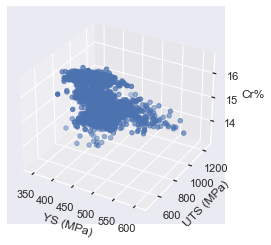

In [ ]:
X=df[['Cr%','Sample thk (mm)','C%', 'Mn%', 'P%','Cu%',
       'Si%', 'Ni%','Mo%',  'Grain Size','N %','Md30']]
y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

# <h1><center>Importing Different models for comparison</center></h1>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse


In [ ]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(random_state=2),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    
    "RandomForestRegressor": RandomForestRegressor( random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(random_state=2),
    
    
    "Xgbregressor":MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror',random_state=2))
    
}

In [ ]:
y_test_predict = dict()
y_mse = dict()
score=dict()
score_train=dict()

for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
    
    score[name]=estimator.score(X_test,y_test)
    score_train[name]=estimator.score(X_train,y_train)

In [ ]:
score

In [ ]:
score_train

# Xgboost

In [ ]:
from sklearn.metrics import r2_score
log=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %','Md30']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = MultiOutputRegressor(xgb.XGBRegressor())
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log.append(rr)

In [ ]:
from sklearn.metrics import r2_score
log=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %','Md30']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = MultiOutputRegressor(xgb.XGBRegressor())
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log.append(rr)

#### Adding Sample thickness in the model thickness 

In [ ]:
from sklearn.metrics import r2_score
log=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = RandomForestRegressor()
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log.append(rr)

In [ ]:
sum(log)/len(log)

In [ ]:
X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%','N %']]
y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 13)


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

In [ ]:
rf.score(X_test,y_test)

In [ ]:
rf

In [ ]:
rf.score(X_train,y_train)

In [ ]:
y_pred_rf=rf.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_rf)

In [ ]:
p1=sum(log)/len(log)
p1

In [ ]:
r2_score(y_test,y_pred_rf)

In [ ]:
y_pred_tr_rf=rf.predict(X_train)

In [ ]:
mean_squared_error(y_test.iloc[:,0],y_pred_rf[:,0],squared=False)

In [ ]:
from scipy.stats import linregress
linregress(y_test.iloc[:,0],y_pred_rf[:,0])

In [ ]:
sum(y_pred_rf[:,0])/len(y_pred_rf[:,0])

# Random Forest Plots

In [ ]:
x1=[376,574]
y1=[]
y2=[]
for x in x1:
    y_1=0.692986*x+152.225
    y_2=0.692986*x+109.477
    y1.append(y_1)
    y2.append(y_2)
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_pred_rf[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"},ax=ax)
YS.set_xlabel("Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)
ax.text(390,525, "r- value=0.84139", fontsize=10)
ax.text(390,510, "stderr=0.0275", fontsize=10)
ax.text(390,495, "RMSE=16.373", fontsize=10)
sns.lineplot(x1,y1,ax=ax,palette='g')
sns.lineplot(x1,y2,ax=ax,palette='g')
plt.title('Testing Data: RF',fontsize=15)

In [ ]:
fig,ax=plt.subplots()
YS=sns.regplot(y_train.iloc[:,0],y_pred_tr_rf[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)

plt.title('Training Data: RF',fontsize=15)

In [ ]:
linregress(y_test.iloc[:,1],y_pred_rf[:,1])

In [ ]:
sum(y_pred_rf[:,1])/len(y_pred_rf[:,1])

In [ ]:
mean_squared_error(y_test.iloc[:,1],y_pred_rf[:,1],squared=False)

In [ ]:
x1=[730,1175]
y1=[]
y2=[]
for x in x1:
    y_1=0.729949*x+186.263
    y_2=0.729949*x+272.05
    y1.append(y_1)
    y2.append(y_2)
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,1],y_pred_rf[:,1],scatter_kws={"color": "red"}, line_kws={"color": "Green"},ax=ax)
YS.set_xlabel("Actual UTS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted UTS (MPa)", fontsize = 15)
ax.text(750,1100, "r- value=0.8746", fontsize=10)
ax.text(750,1050, "stderr=0.025", fontsize=10)

sns.lineplot(x1,y1,ax=ax,palette='g')
sns.lineplot(x1,y2,ax=ax,palette='g')
plt.title('Testing Data: RF',fontsize=15)

In [ ]:
a=y_train-y_pred_tr_rf

In [ ]:
fig,ax=plt.subplots()
y_pred_tr_rf=rf.predict(X_train)
YS=sns.regplot(y_train.iloc[:,1],y_pred_tr_rf[:,1],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual UTS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted UTS (MPa)", fontsize = 15)

plt.title('Training Data: RF',fontsize=15)

In [ ]:
linregress(y_test.iloc[:,2],y_pred_rf[:,2])

In [ ]:
sum(y_pred_rf[:,2])/len(y_pred_rf[:,2])

In [ ]:
mean_squared_error(y_test.iloc[:,2],y_pred_rf[:,2],squared=False)

In [ ]:
x1=[26,69]
y1=[]
y2=[]
y3=[]
y4=[]
for x in x1:
    y_1=0.758*x+10.1736
    y_2=0.758*x+15.579
    y_3=0.758*x+7.45336
    y_4=0.758*x+18.3346
    y1.append(y_1)
    y2.append(y_2)
    y3.append(y_3)
    y4.append(y_4)
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,2],y_pred_rf[:,2],scatter_kws={"color": "red"}, line_kws={"color": "Green"},ax=ax)
YS.set_xlabel("Actual El% on 50mm Gl", fontsize = 15)
YS.set_ylabel("Predicted El% on 50mm Gl", fontsize = 15)
ax.text(27,60, "r- value=0.885", fontsize=10)
ax.text(27,55, "stderr=0.02468", fontsize=10)

# sns.lineplot(x1,y1,ax=ax,palette='g')
# sns.lineplot(x1,y2,ax=ax,palette='g')
sns.lineplot(x1,y3,ax=ax,palette='g')
sns.lineplot(x1,y4,ax=ax,palette='g')
plt.title('Testing Data: RF',fontsize=15)

In [ ]:
fig,ax=plt.subplots()
YS=sns.regplot(y_train.iloc[:,2],y_pred_tr_rf[:,2],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual Elongation", fontsize = 15)
YS.set_ylabel("Predicted Elongation", fontsize = 15)

plt.title('Training Data: RF',fontsize=15)

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
y_pred=pd.read_csv("../input/tensile/y_pred_rf.csv")


In [ ]:
r2_score(y_test.iloc[:,2],y_pred.iloc[:,5])

In [ ]:
mae_ys=mean_absolute_error(y_pred.iloc[:,0],y_pred.iloc[:,3])
rmse_ys=mean_squared_error(y_pred.iloc[:,0],y_pred.iloc[:,3],squared=False)
rrmse_ys=rmse_ys*100/y_pred.iloc[:,0].mean()
r2_mse=r2_score(y_pred.iloc[:,0],y_pred.iloc[:,3])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

In [ ]:
mae_ys=mean_absolute_error(y_pred.iloc[:,1],y_pred.iloc[:,4])
rmse_ys=mean_squared_error(y_pred.iloc[:,1],y_pred.iloc[:,4],squared=False)
rrmse_ys=rmse_ys*100/y_pred.iloc[:,1].mean()
r2_mse=r2_score(y_pred.iloc[:,1],y_pred.iloc[:,4])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

In [ ]:
mae_ys=mean_absolute_error(y_pred.iloc[:,2],y_pred.iloc[:,5])
rmse_ys=mean_squared_error(y_pred.iloc[:,2],y_pred.iloc[:,5],squared=False)
rrmse_ys=rmse_ys*100/y_pred.iloc[:,2].mean()
r2_mse=r2_score(y_pred.iloc[:,2],y_pred.iloc[:,5])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

In [ ]:
a=np.array([[12.10,16.56,3.87,0.70],[22.74,32.74,3.80,0.84],[3.35,4.60,8.41,0.81]])
b=a.T
b

In [ ]:
variables=['YS (MPa)','UTS (MPa)','%Elongation']
metrics=['MAE','RMSE','RRMSE','R2']
fig, ax = plt.subplots()
im = ax.imshow(b)

# We want to show all ticks...
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(metrics)))

# ... and label them with the respective list entries
ax.set_xticklabels(variables)
ax.set_yticklabels(metrics)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrics)):
    for j in range(len(variables)):
        text = ax.text(j, i, b[i, j],
                       ha="center", va="center", color="w")

ax.set_title("ETR Model")
fig.tight_layout()
plt.show()

# ExtraTreesRegressor

In [ ]:
from sklearn.metrics import r2_score
log2=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%','Cu%','Mo%','N %','Md30']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = ExtraTreesRegressor()
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log2.append(rr)

In [ ]:
max(log2)

In [ ]:
X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 1)

In [ ]:
model1=ExtraTreesRegressor()
model1.fit(X_train,y_train)

In [ ]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 1)]

# Minimum number of samples required to split a node
min_samples_split = [2, 3,4,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
ETR_random = RandomizedSearchCV(estimator = model1, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
ETR_random.fit(X_train,y_train)

In [ ]:
ETR_random.score(X_test,y_test)

In [ ]:
ETR_random.best_params_

In [ ]:
model1.score(X_train,y_train)

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = random_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# grid_search.fit(X_train,y_train)

In [ ]:
rf_random.score(X_test,y_test)

In [ ]:
y_et_tr=model1.predict(X_train)

In [ ]:
# grid_search.best_params_

In [ ]:
# grid_search.score(X_test,y_test)

In [ ]:
# grid_search.score(X_train,y_train)

In [ ]:
y_et=model1.predict(X_test)
r2_score(y_test,y_et)

In [ ]:
y_et=model1.predict(X_test)
from scipy import stats
from scipy.stats import linregress
linregress(y_test.iloc[:,0],y_et[:,0])

In [ ]:
r2_score(y_test.iloc[:,0],y_et[:,0])

In [ ]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_et[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"},ci=95)
YS.set_xlabel("Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)

plt.title('Testing Data',fontsize=15)

In [ ]:
yt=model1.predict(X_train)
linregress(y_train.iloc[:,0],yt[:,0])

In [ ]:
r2_score(y_train.iloc[:,0],yt[:,0])

### Checking which test_size is better for modelling

In [ ]:
fig,ax =plt.subplots()
x1=[350,600]
for x in x1:
    y1=x1
sns.scatterplot(y_train.iloc[:,0],yt[:,0],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,0],y_et[:,0],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
# plt.x_label("Actual YS (MPa)", fontsize = 15)
# ax.set(xlabel="Actual YS (MPa)",ylabel="Predicted YS (MPa)")
plt.xlabel("Actual YS (MPa)", fontsize=15)
plt.ylabel("Predicted YS (MPa)", fontsize=15)
plt.legend(loc='upper left');
plt.show()


In [ ]:
fig,ax =plt.subplots()
x1=[350,600]
y=[350,600]
x2=[326.25,576.25]
x3=[373.75,623.75]
for x in x1:
    y1=x1
    y2=x2
    y3=x3
sns.scatterplot(y_train.iloc[:,0],yt[:,0],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,0],y_et[:,0],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
sns.lineplot(x1,y2,ax=ax,linestyle='dashed',color='black')
sns.lineplot(x1,y3,ax=ax,linestyle='dashed',color='black')
ax.annotate('5% error line',
            xy=(470, 490), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.03,width=3),
            horizontalalignment='right', verticalalignment='top')
# ax.set(xlabel="Actual YS (MPa)",ylabel="Predicted YS (MPa)")
plt.xlabel("Actual YS (MPa)", fontsize=15)
plt.ylabel("Predicted YS (MPa)", fontsize=15)
plt.legend(loc='upper left');
plt.show()


In [ ]:
fig,ax=plt.subplots()
YS=sns.regplot(y_train.iloc[:,0],yt[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)

plt.title('Training Data: ETR model',fontsize=15)

In [ ]:
linregress(y_test.iloc[:,1],y_et[:,1])

In [ ]:
r2_score(y_test.iloc[:,1],y_et[:,1])

In [ ]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,1],y_et[:,1],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual UTS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted UTS (MPa)", fontsize = 15)

plt.title('Testing Data',fontsize=15)

In [ ]:
fig,ax=plt.subplots()
YS=sns.regplot(y_train.iloc[:,1],yt[:,1],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual UTS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted UTS (MPa)", fontsize = 15)

plt.title('Training Data: ETR model',fontsize=15)

In [ ]:
fig,ax =plt.subplots()
x1=[620,1200]
for x in x1:
    y1=x1
sns.scatterplot(y_train.iloc[:,1],yt[:,1],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,1],y_et[:,1],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
# # plt.x_label("Actual YS (MPa)", fontsize = 15)
# ax.set(xlabel="Actual UTS (MPa)",ylabel="Predicted UTS (MPa)")
plt.xlabel("Actual UTS (MPa)", fontsize=15)
plt.ylabel("Predicted UTS (MPa)", fontsize=15)
plt.legend(loc='upper left');
plt.show()

In [ ]:
fig,ax =plt.subplots()
x1=[620,1200]
y=[620,1200]
x2=[574.5,1154.5]
x3=[665.5,1245.5]
for x in x1:
    y1=x1
    y2=x2
    y3=x3
sns.scatterplot(y_train.iloc[:,1],yt[:,1],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,1],y_et[:,1],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
sns.lineplot(x1,y2,ax=ax,linestyle='dashed',color='black')
sns.lineplot(x1,y3,ax=ax,linestyle='dashed',color='black')
ax.annotate('5% error line',
            xy=(1000, 1040), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.03,width=3),
            horizontalalignment='right', verticalalignment='top')
# ax.set(xlabel="Actual UTS (MPa)",ylabel="Predicted UTS (MPa)")
plt.xlabel("Actual UTS (MPa)", fontsize=15)
plt.ylabel("Predicted UTS (MPa)", fontsize=15)
plt.legend(loc='upper left');
plt.show()

In [ ]:
r2_score(y_train.iloc[:,2],y_et_tr[:,2])

In [ ]:
r2_score(y_test.iloc[:,2],y_et[:,2])

In [ ]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,2],y_et[:,2],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual El% on 50mm GL", fontsize = 15)
YS.set_ylabel("Predicted El% on 50mm GL", fontsize = 15)

plt.title('Testing Data',fontsize=15)

In [ ]:
fig,ax=plt.subplots()
YS=sns.regplot(y_train.iloc[:,2],yt[:,2],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual El% on 50mm GL", fontsize = 15)
YS.set_ylabel("Predicted El% on 50mm GL", fontsize = 15)

plt.title('Training Data: ETR',fontsize=15)

In [ ]:
fig,ax =plt.subplots()
x1=[25,70]
y=[25,70]
x2=[27.35,72.375]
x3=[22.625,67.625]
x4=[29.75,74.75]
x5=[20.25,65.25]
for x in x1:
    y1=x1
    y2=x2
    y3=x3
    y4=x4
    y5=x5
sns.scatterplot(y_train.iloc[:,2],yt[:,2],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,2],y_et[:,2],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
# sns.lineplot(x1,y2,ax=ax,linestyle='dashed',color='black')
# sns.lineplot(x1,y3,ax=ax,linestyle='dashed',color='black')
sns.lineplot(x1,y4,ax=ax,linestyle='dashed',color='black')
sns.lineplot(x1,y5,ax=ax,linestyle='dashed',color='black')
# ax.set(xlabel="Actual El% per 50mm GL)",ylabel="Predicted El% per 50mm GL")
plt.xlabel("Actual El% per 50mm GL", fontsize=15)
plt.ylabel("Predicted El% per 50mm GL", fontsize=15)

ax.annotate('10% error line',
            xy=(40, 45), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.03,width=3),
            horizontalalignment='right', verticalalignment='top')
plt.legend(loc='upper left');
plt.show()

In [ ]:
fig,ax =plt.subplots()
x1=[25,70]
for x in x1:
    y1=x1
sns.scatterplot(y_train.iloc[:,2],yt[:,2],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,2],y_et[:,2],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
# plt.x_label("Actual YS (MPa)", fontsize = 15)
# ax.set(xlabel="Actual El% per 50mm GL",ylabel="Predicted El% per 50mm GL")
plt.xlabel("Actual El% per 50mm GL", fontsize=15)
plt.ylabel("Predicted El% per 50mm GL", fontsize=15)

plt.legend(loc='upper left');
plt.show()

In [ ]:
# model1=ExtraTreesRegressor(warm_start= False,
#     n_estimators= 40,min_samples_split=3,
#  min_samples_leaf=1,
#  max_features= 'sqrt',
#  max_depth =18,
#  criterion= 'mse',
#  bootstrap= False)
# #n_estimators=56,min_samples_split=3,max_features=5,
# model1.fit(X_train,y_train)
yt=model1.predict(X_train)

In [ ]:
print(r2_score(y_train.iloc[:,0],yt[:,0]))
print(r2_score(y_train.iloc[:,1],yt[:,1]))
print(r2_score(y_train.iloc[:,2],yt[:,2]))

In [ ]:
linregress(y_test.iloc[:,1],y_et[:,1])

In [ ]:
# y_train=y_train.drop([1810],axis=0

In [ ]:

fig, ax = plt.subplots()
slope, intercept, r_value, pv, se = stats.linregress(y_train.iloc[:,0],yt[:,0])
YS=sns.regplot(y_train.iloc[:,0],yt[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"},)
YS.set_xlabel(" Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)
ax.text(350,565, "R2=0.97848", fontsize=10)
ax.text(350,540, "RMSE=7.54", fontsize=10)
plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Training Data',fontsize=15)
#plt.grid()

# Evaluation of ExtraTrees

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
et=pd.read_csv("../input/tensile/y_et.csv")

In [ ]:
x_ax = range(len(X_test))
f, ax = plt.subplots(1, 1, figsize = (15, 6))
plt.plot(x_ax, et.iloc[:,3],  label="YS (MPa)")
plt.plot(x_ax, et.iloc[:,0], label="YS-pred")
plt.plot(x_ax, et.iloc[:,4],label="UTS (MPa)")
plt.plot(x_ax, et.iloc[:,1], label="UTS-pred")
plt.plot(x_ax, et.iloc[:,5], label="El% on 50mm GL ")
plt.plot(x_ax, et.iloc[:,2], label="%Elongation-pred")
plt.title('Comparison Between Orinal Data and Predicted Values using RF model',fontsize=15)
ax.text(-5,1050, "UTS (MPa)",bbox=dict(facecolor='green', alpha=0.6), fontsize=15)
ax.text(-5,500, "YS (MPa)",bbox=dict(facecolor='blue', alpha=0.5), fontsize=15)
ax.text(-5,100, "El% per 50 mm GL)",bbox=dict(facecolor='purple', alpha=0.5), fontsize=15)
plt.legend()

plt.show()

# YS

In [ ]:

mae_ys=mean_absolute_error(et.iloc[:,3],et.iloc[:,0])
rmse_ys=mean_squared_error(et.iloc[:,3],et.iloc[:,0],squared=False)
rrmse_ys=rmse_ys*100/et.iloc[:,3].mean()
r2_mse=r2_score(et.iloc[:,3],et.iloc[:,0])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

In [ ]:
linregress(y_train.iloc[:,0],yt[:,0])

# UTS

In [ ]:
mae_ys=mean_absolute_error(et.iloc[:,4],et.iloc[:,1])
rmse_ys=mean_squared_error(et.iloc[:,4],et.iloc[:,1],squared=False)
rrmse_ys=rmse_ys*100/et.iloc[:,4].mean()
r2_mse=r2_score(et.iloc[:,4],et.iloc[:,1])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

# Elongation

In [ ]:
mae_ys=mean_absolute_error(et.iloc[:,5],et.iloc[:,2])
rmse_ys=mean_squared_error(et.iloc[:,5],et.iloc[:,2],squared=False)
rrmse_ys=rmse_ys*100/et.iloc[:,5].mean()
r2_mse=r2_score(et.iloc[:,5],et.iloc[:,2])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

In [ ]:
d=np.array([[12.494,17.265,4.037,0.6952],[22.56,33.482,3.91,0.84],[3.314,4.711,8.521,0.76]])
e=d.T
e

In [ ]:



variables=['YS (MPa)','UTS (MPa)','%Elongation']
metrics=['MAE','RMSE','RRMSE','R2']
fig, ax = plt.subplots()
im = ax.imshow(e)

# We want to show all ticks...
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(metrics)))

# ... and label them with the respective list entries
ax.set_xticklabels(variables)
ax.set_yticklabels(metrics)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrics)):
    for j in range(len(variables)):
        text = ax.text(j, i, e[i, j],
                       ha="center", va="center", color="w")

ax.set_title("RF Model")
fig.tight_layout()
plt.show()

In [ ]:
err_ys=(et.iloc[:,3]-et.iloc[:,0])/et.iloc[:,3]*100

In [ ]:
err1=abs(err_ys)
err1

In [ ]:
sum(err1)/len(err1)

In [ ]:


x=[y for y in range(1,264,1)]
w=1

bar1=np.arange(len(x))
fig,ax=plt.subplots(figsize=(15,6))
plt.bar(bar1,err_ys,w,label='YS (MPa)',color='purple')

#plt.xticks(bar1,x)
plt.xlabel('Test Data Samples',fontsize=15)
plt.ylabel('% Error',fontsize=15)
plt.title('Yield Strength',fontsize=15)

In [ ]:
err_uts=(et.iloc[:,4]-et.iloc[:,1])/et.iloc[:,4]*100

In [ ]:
err_uts.shape

In [ ]:
x=[y for y in range(1,264,1)]
w=1

bar1=np.arange(len(x))
fig,ax=plt.subplots(figsize=(15,6))
plt.bar(bar1,err_uts,w,label='YS (MPa)',color='red')

#plt.xticks(bar1,x)
plt.xlabel('Test Data Samples',fontsize=15)
plt.ylabel('% Error',fontsize=15)
plt.title('Ultimate Tensile Strength',fontsize=15)

In [ ]:
measured=y_test.iloc[:,0]
actual=y_et[:,0]
err_uts=(actual -measured)/actual*100

In [ ]:
err_uts.shape

In [ ]:
x=[y for y in range(1,264,1)]
w=1

bar1=np.arange(len(x))
fig,ax=plt.subplots(figsize=(15,6))
plt.bar(bar1,err_uts,w,color='green')

#plt.xticks(bar1,x)
plt.xlabel('Test Data Samples',fontsize=15)
plt.ylabel('% Error',fontsize=15)
plt.title('El% on 50mm GL',fontsize=15)

In [ ]:
df.columns

In [ ]:
df.drop(['B%', 'Pb (ppm)',
       'Sn (pppm)', 'Cu+Ni','S%'],inplace=True,axis=1)

# TO Plot MIV feature importance

In [ ]:
X_train['Cr_plus']=X_train['Cr%']+0.1*X_train['Cr%']
X_train['Cr_minus']=X_train['Cr%']-0.1*X_train['Cr%']
X_train['sam_plus']=X_train['Sample thk (mm)']+0.1*X_train['Sample thk (mm)']
X_train['sam_minus']=X_train['Sample thk (mm)']-0.1*X_train['Sample thk (mm)']
X_train['C_plus']=X_train['C%']+0.1*X_train['C%']
X_train['C-minus']=X_train['C%']-0.1*X_train['C%']
X_train['Mn_plus']=X_train['Mn%']+0.1*X_train['Mn%']
X_train['Mn_minus']=X_train['Mn%']-0.1*X_train['Mn%']
X_train['P_plus']=X_train['P%']+0.1*X_train['P%']
X_train['P_minus']=X_train['P%']-0.1*X_train['P%']
X_train['Si_plus']=X_train['Si%']+0.1*X_train['Si%']
X_train['Si_minus']=X_train['Si%']-0.1*X_train['Si%']
X_train['Ni_plus']=X_train['Ni%']+0.1*X_train['Ni%']
X_train['Ni_minus']=X_train['Ni%']-0.1*X_train['Ni%']
X_train['Cu_plus']=X_train['Cu%']+0.1*X_train['Cu%']
X_train['Cu_minus']=X_train['Cu%']-0.1*X_train['Cu%']
X_train['Mo_plus']=X_train['Mo%']+0.1*X_train['Mo%']
X_train['Mo_minus']=X_train['Mo%']-0.1*X_train['Mo%']
# X_train['Grain_plus']=X_train['Grain Size']+0.1*X_train['Grain Size']
# X_train['Grain_minus']=X_train['Grain Size']-0.1*X_train['Grain Size']
X_train['N_plus']=X_train['N %']+0.1*X_train['N %']
X_train['N_minus']=X_train['N %']-0.1*X_train['N %']


In [ ]:
cr1=X_train[['Cr_plus', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
cr2=X_train[['Cr_minus', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
sam1=X_train[['Cr%', 'sam_plus', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
       'N %']]
sam2=X_train[['Cr%', 'sam_minus', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%', 'N %']]
c1=X_train[['Cr%', 'Sample thk (mm)', 'C_plus', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
c2=X_train[['Cr%', 'Sample thk (mm)', 'C-minus', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
M1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn_plus', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
M2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn_minus', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
P1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P_plus', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
p2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P_minus', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
s1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si_plus', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
s2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si_minus', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
ni1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni_plus', 'Cu%', 'Mo%',
       'N %']]
ni2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni_minus', 'Cu%', 'Mo%',
        'N %']]
cu1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu_plus', 'Mo%',
       'N %']]
cu2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu_minus', 'Mo%',
        'N %']]
mo1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo_plus',
        'N %']]
mo2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo_minus',
        'N %']]
# grain1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
#        'Grain_plus', 'N %']]
# grain2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
#        'Grain_minus', 'N %']]
N1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N_plus']]
N2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N_minus']]

In [ ]:
X_train

In [ ]:
X_train.columns

In [ ]:
cr_1=model1.predict(cr1)
cr_2=model1.predict(cr2)
cr_iv=cr_1-cr_2

cr_ys=sum(cr_iv[:,0])/len(cr_iv[:,0])
cr_uts=sum(cr_iv[:,1])/len(cr_iv[:,1])
cr_el=sum(cr_iv[:,2])/len(cr_iv[:,2])
print('ETR')
print([cr_ys,cr_uts,cr_el])


In [ ]:
cr_1=rf.predict(cr1)
cr_2=rf.predict(cr2)
cr_iv=cr_1-cr_2

cr_ys=sum(cr_iv[:,0])/len(cr_iv[:,0])
cr_uts=sum(cr_iv[:,1])/len(cr_iv[:,1])
cr_el=sum(cr_iv[:,2])/len(cr_iv[:,2])
print('RF')
print([cr_ys,cr_uts,cr_el])


In [ ]:
sam_1=model1.predict(sam1)
sam_2=model1.predict(sam2)
sam_iv=sam_1-sam_2

sam_ys=sum(sam_iv[:,0])/len(sam_iv[:,0])
sam_uts=sum(sam_iv[:,1])/len(sam_iv[:,1])
sam_el=sum(sam_iv[:,2])/len(sam_iv[:,2])
print('ETR')
print([sam_ys,sam_uts,sam_el])


In [ ]:
sam_1=rf.predict(sam1)
sam_2=rf.predict(sam2)
sam_iv=sam_1-sam_2

sam_ys=sum(sam_iv[:,0])/len(sam_iv[:,0])
sam_uts=sum(sam_iv[:,1])/len(sam_iv[:,1])
sam_el=sum(sam_iv[:,2])/len(sam_iv[:,2])
print('RF')
print([sam_ys,sam_uts,sam_el])


In [ ]:
C_1=model1.predict(c1)
C_2=model1.predict(c2)
c_iv=C_1-C_2
c_ys=sum(c_iv[:,0])/len(c_iv[:,0])
c_uts=sum(c_iv[:,1])/len(c_iv[:,1])
c_el=sum(c_iv[:,2])/len(c_iv[:,2])
print('ETR')
print([c_ys,c_uts,c_el])


In [ ]:
C_1=rf.predict(c1)
C_2=rf.predict(c2)
c_iv=C_1-C_2
c_ys=sum(c_iv[:,0])/len(c_iv[:,0])
c_uts=sum(c_iv[:,1])/len(c_iv[:,1])
c_el=sum(c_iv[:,2])/len(c_iv[:,2])
print('RF')
print([c_ys,c_uts,c_el])

In [ ]:
M_1=model1.predict(M1)
M_2=model1.predict(M2)
m_iv=M_1-M_2
M_ys=sum(m_iv[:,0])/len(m_iv[:,0])
M_uts=sum(m_iv[:,1])/len(m_iv[:,1])
M_el=sum(m_iv[:,2])/len(m_iv[:,2])
print('ETR')
print([M_ys,M_uts,M_el])


In [ ]:
M_1=rf.predict(M1)
M_2=rf.predict(M2)
m_iv=M_1-M_2
M_ys=sum(m_iv[:,0])/len(m_iv[:,0])
M_uts=sum(m_iv[:,1])/len(m_iv[:,1])
M_el=sum(m_iv[:,2])/len(m_iv[:,2])
print('RF')
print([M_ys,M_uts,M_el])


In [ ]:
p_1=model1.predict(P1)
p_2=model1.predict(p2)
p_iv=p_1-p_2
P_ys=sum(p_iv[:,0])/len(p_iv[:,0])
P_uts=sum(p_iv[:,1])/len(p_iv[:,1])
P_el=sum(p_iv[:,2])/len(p_iv[:,2])
print('ETR')
print([P_ys,P_uts,P_el])


In [ ]:
p_1=rf.predict(P1)
p_2=rf.predict(p2)
p_iv=p_1-p_2
P_ys=sum(p_iv[:,0])/len(p_iv[:,0])
P_uts=sum(p_iv[:,1])/len(p_iv[:,1])
P_el=sum(p_iv[:,2])/len(p_iv[:,2])
print('RF')
print([P_ys,P_uts,P_el])

In [ ]:
si_1=model1.predict(s1)
si_2=model1.predict(s2)
si_iv=si_1-si_2
Si_ys=sum(si_iv[:,0])/len(si_iv[:,0])
Si_uts=sum(si_iv[:,1])/len(si_iv[:,1])
Si_el=sum(si_iv[:,2])/len(si_iv[:,2])
print('ETR')
print([Si_ys,Si_uts,Si_el])


In [ ]:
si_1=rf.predict(s1)
si_2=rf.predict(s2)
si_iv=si_1-si_2
Si_ys=sum(si_iv[:,0])/len(si_iv[:,0])
Si_uts=sum(si_iv[:,1])/len(si_iv[:,1])
Si_el=sum(si_iv[:,2])/len(si_iv[:,2])
print('RF')
print([Si_ys,Si_uts,Si_el])


In [ ]:
ni_1=model1.predict(ni1)
ni_2=model1.predict(ni2)
ni_iv=ni_1-ni_2
Ni_ys=sum(ni_iv[:,0])/len(ni_iv[:,0])
Ni_uts=sum(ni_iv[:,1])/len(ni_iv[:,1])
Ni_el=sum(ni_iv[:,2])/len(ni_iv[:,2])
print('ETR')
print([Ni_ys,Ni_uts,Ni_el])


In [ ]:
ni_1=rf.predict(ni1)
ni_2=rf.predict(ni2)
ni_iv=ni_1-ni_2
Ni_ys=sum(ni_iv[:,0])/len(ni_iv[:,0])
Ni_uts=sum(ni_iv[:,1])/len(ni_iv[:,1])
Ni_el=sum(ni_iv[:,2])/len(ni_iv[:,2])
print('RF')
print([Ni_ys,Ni_uts,Ni_el])


In [ ]:
cu_1=model1.predict(cu1)
cu_2=model1.predict(cu2)
cu_iv=cu_1-cu_2
Cu_ys=sum(cu_iv[:,0])/len(cu_iv[:,0])
Cu_uts=sum(cu_iv[:,1])/len(cu_iv[:,1])
Cu_el=sum(cu_iv[:,2])/len(cu_iv[:,2])
print('ETR')
print([Cu_ys,Cu_uts,Cu_el])


In [ ]:
cu_1=rf.predict(cu1)
cu_2=rf.predict(cu2)
cu_iv=cu_1-cu_2
Cu_ys=sum(cu_iv[:,0])/len(cu_iv[:,0])
Cu_uts=sum(cu_iv[:,1])/len(cu_iv[:,1])
Cu_el=sum(cu_iv[:,2])/len(cu_iv[:,2])
print('RF')
print([Cu_ys,Cu_uts,Cu_el])

In [ ]:
mo_1=model1.predict(mo1)
mo_2=model1.predict(mo2)
mo_iv=mo_1-mo_2
Mo_ys=sum(mo_iv[:,0])/len(mo_iv[:,0])
Mo_uts=sum(mo_iv[:,1])/len(mo_iv[:,1])
Mo_el=sum(mo_iv[:,2])/len(mo_iv[:,2])
print('ETR')
print([Mo_ys,Mo_uts,Mo_el])


In [ ]:
mo_1=rf.predict(mo1)
mo_2=rf.predict(mo2)
mo_iv=mo_1-mo_2
Mo_ys=sum(mo_iv[:,0])/len(mo_iv[:,0])
Mo_uts=sum(mo_iv[:,1])/len(mo_iv[:,1])
Mo_el=sum(mo_iv[:,2])/len(mo_iv[:,2])
print('RF')
print([Mo_ys,Mo_uts,Mo_el])

In [ ]:
N_1=model1.predict(N1)
N_2=model1.predict(N2)
n_iv=N_1-N_2
N_ys=sum(n_iv[:,0])/len(n_iv[:,0])
N_uts=sum(n_iv[:,1])/len(n_iv[:,1])
N_el=sum(n_iv[:,2])/len(n_iv[:,2])
print('ETR')
print([N_ys,N_uts,N_el])


In [ ]:
N_1=rf.predict(N1)
N_2=rf.predict(N2)
n_iv=N_1-N_2
N_ys=sum(n_iv[:,0])/len(n_iv[:,0])
N_uts=sum(n_iv[:,1])/len(n_iv[:,1])
N_el=sum(n_iv[:,2])/len(n_iv[:,2])
print('RF')
print([N_ys,N_uts,N_el])

In [ ]:
X.shape

In [ ]:
MIV_rf=[[-6.45, -43.155, 5.378],[1.165, 1.644, -0.138],[0.73, 1.089, -0.213],[7.326, 3.296, -0.23],[-0.282, 0.313, 0.246],[0.41, 1.27, 0.364],
        [-3.282, -4.043, 0.0877],[-4.489, -8.977, 0.421],[0.043, 1.40, 0.02],[7.094, 6.273, -0.52]]
MIV_rf=pd.DataFrame(MIV_rf,columns=['YS (MPa)','UTS (MPa)','Elongation'])
MIV_rf

# MIV using ExtraTrees

In [ ]:
MIV=[[-1.5363, -13.9889, 3.324573],[0.53898, -0.24896, -0.13568],[0.8834, -1.5341, -0.2852],[3.1411, -0.20734, -0.2122],
     [-0.388, -1.605, 0.0051],[-0.0454, -1.0304, 0.0891],[-3.745, -4.304, 0.2288],[-5.105, -12.546, 0.0151],
     [0.0155, 1.144, 0.0185],[4.4797, 0.702, -0.322]]
MIV=pd.DataFrame(MIV,columns=['YS (MPa)','UTS (MPa)','Elongation'])

    

In [ ]:
feature=['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']
MIV['Feature']=feature

In [ ]:
MIV_sorted1= MIV.sort_values('YS (MPa)')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="YS (MPa)",y="Feature", data=MIV_sorted1)

In [ ]:
MIV_sorted2= MIV.sort_values('UTS (MPa)')
fig,ax=plt.subplots()
ax = sns.barplot(x="UTS (MPa)",y="Feature", data=MIV_sorted2)

In [ ]:
MIV_sorted1= MIV.sort_values('Elongation')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="Elongation",y="Feature", data=MIV_sorted1)

# MIV Uisng RandomForest

In [ ]:
feature=['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']
MIV_rf['Feature']=feature

In [ ]:
MIV_sorted1= MIV_rf.sort_values('Elongation')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="Elongation",y="Feature", data=MIV_sorted1)

In [ ]:
MIV_sorted1= MIV_rf.sort_values('YS (MPa)')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="YS (MPa)",y="Feature", data=MIV_sorted1)

In [ ]:
MIV_sorted1= MIV_rf.sort_values('UTS (MPa)')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="UTS (MPa)",y="Feature", data=MIV_sorted1)

In [ ]:
MIV_sorted1= MIV_rf.sort_values('Elongation')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="Elongation",y="Feature", data=MIV_sorted1)

In [ ]:
X_train=X_train.drop(['Cr_plus', 'Cr_minus', 'sam_plus', 'sam_minus',
       'C_plus', 'C-minus', 'Mn_plus', 'Mn_minus', 'P_plus', 'P_minus',
       'Si_plus', 'Si_minus', 'Ni_plus', 'Ni_minus', 'Cu_plus', 'Cu_minus',
       'Mo_plus', 'Mo_minus',  'N_plus',
       'N_minus'],axis=1)

In [ ]:
X_train

# Shap Method using Extra Tree

In [ ]:
import shap
shap_value1 = shap.TreeExplainer(model1).shap_values(X_train)

In [ ]:

def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on YS (MPa))")
    
ABS_SHAP(shap_value1[0],X_train) 

In [ ]:

def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on UTS (MPa))")
    
ABS_SHAP(shap_value1[1],X_train) 

In [ ]:
ABS_SHAP(shap_value1[2],X_train) 

# Shap method on test Data using ETR

In [ ]:
import shap
shap_value2 = shap.TreeExplainer(model1).shap_values(X_test)
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on YS (MPa))")
    
ABS_SHAP(shap_value2[0],X_test) 

In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on UTS (MPa))")
    
ABS_SHAP(shap_value2[1],X_test) 

In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on Elongation")
    
ABS_SHAP(shap_value2[2],X_test) 

### plotting the correlation of input variables with output

In [ ]:
# log=[]
# for i in range(0,40,1):
#     for j in np.arange(0.05,0.35,0.05):
#         X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%', 'P%',
#        'Si%', 'Ni%', 'Cu%','Mo%',  'Grain Size','N %']]
#         y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
        
#         X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = j, shuffle = True, random_state = i)
#         reg = RandomForestRegressor()
#         reg.fit(X_train_rf,y_train_rf)
#         pred_TI = reg.predict(X_test_rf)
#         rr = r2_score(y_test_rf, pred_TI)
#         #print(rr, i,j)
#         log.append([rr,i,j])

In [ ]:
# log=pd.DataFrame(log,columns=['r2_score','random_state','test_size'])
# log['r2_score'].idxmax()

In [ ]:
# log[135:140]

In [ ]:
X_rf=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%', 'P%',
       'Si%', 'Ni%', 'Cu%','Mo%',  'Grain Size','N %']]
y_rf=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
        
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.05, shuffle = True, random_state = 17)


In [ ]:
err=abs(y_test-y_et)

In [ ]:
y_et=model1.predict(X_test)
y_pred_rf=rf.predict(X_test)

In [ ]:
linregress(y_test.iloc[:,0],y_et[:,0])

In [ ]:
linregress(y_test.iloc[:,1],y_et[:,1])

In [ ]:
mean_squared_error(y_test.iloc[:,1],y_et[:,1],squared=False)

In [ ]:
linregress(y_test.iloc[:,2],y_et[:,2])

In [ ]:
mean_squared_error(y_test.iloc[:,2],y_et[:,2],squared=False)

# Violin plot for comparison between ETR and RF

In [ ]:
def drawViolinPlot(xlabel, xticks, xticklabels, ylabel, bandwidth, title):

    # Customize x-axis
    fig,ax=plt.subplots()
    ax.set_xlabel(xlabel);

    ax.set_xticks(xticks);

    ax.set_xticklabels(xticklabels);

 

    # Customize y-axis

    ax.set_ylabel(ylabel);

 

    # Draw a violin plot for the distributions - Default bandwidth

    violin_parts=ax.violinplot(sequences,  showmedians=True, bw_method=bandwidth);

    ax.set_title(title);
    rrred = '#ff2222'
    bluuu = '#2222ff'
    for vp in violin_parts['bodies']:
        vp.set_facecolor(bluuu)
        vp.set_edgecolor(rrred)
        vp.set_linewidth(1)
        vp.set_alpha(0.5)

 

 

# Distributions as python lists
data_to_plot=[y_test.iloc[:,0],y_et[:,0],y_pred.iloc[:,3]]



 

# A tuple of distributions

sequences = (y_test.iloc[:,0],y_et[:,0],y_pred.iloc[:,3]);


plt.subplots_adjust(hspace=1);

 

bandwidth = None;

drawViolinPlot(

              "Models",

              np.arange(len(sequences)+1),

              ('', 'Actual ', 'ETR ','RF'),

              "Yield Strength in MPa", bandwidth,

              "Comparison of different models");

 

# Display violin plot

plt.show();                 

In [ ]:
def drawViolinPlot(xlabel, xticks, xticklabels, ylabel, bandwidth, title):

    # Customize x-axis
    fig,ax=plt.subplots()
    ax.set_xlabel(xlabel);

    ax.set_xticks(xticks);

    ax.set_xticklabels(xticklabels);
    # Customize y-axis
    ax.set_ylabel(ylabel);
   # Draw a violin plot for the distributions - Default bandwidth
    violin_parts=ax.violinplot(sequences,  showmedians=True, bw_method=bandwidth);
    ax.set_title(title);
    rrred = '#009761'
    bluuu = '#2222ff'
    khn='#007063'
    for vp in violin_parts['bodies']:
        vp.set_facecolor(rrred)
        vp.set_edgecolor(bluuu)
        vp.set_linewidth(1)
        vp.set_alpha(0.5)
# Distributions as python lists
data_to_plot1=[y_test.iloc[:,1],y_et[:,1],y_pred.iloc[:,4]]
# A tuple of distributions
sequences = (y_test.iloc[:,1],y_et[:,1],y_pred.iloc[:,4]);
plt.subplots_adjust(hspace=1);
bandwidth = None;
drawViolinPlot("Models",
              np.arange(len(sequences)+1),

              ('', 'Actual ', 'ETR','RF'),

              "Ultimate Tensile Strength in MPa", bandwidth,

              "Comparison of different models");
# Display violin plot

plt.show();       

In [ ]:
def drawViolinPlot(xlabel, xticks, xticklabels, ylabel, bandwidth, title):
    # Customize x-axis
    fig,ax=plt.subplots()
    ax.set_xlabel(xlabel);
    ax.set_xticks(xticks);
    ax.set_xticklabels(xticklabels);
    # Customize y-axis
    ax.set_ylabel(ylabel);
    # Draw a violin plot for the distributions - Default bandwidth
    violin_parts=ax.violinplot(sequences,  showmedians=True, bw_method=bandwidth);
    ax.set_title(title);
    rrred = '#ff2222'
    bluuu = '#2222ff'
    kjh='#F80000'
    for vp in violin_parts['bodies']:
        vp.set_facecolor(kjh)
        vp.set_edgecolor(rrred)
        vp.set_linewidth(1)
        vp.set_alpha(0.5)
# Distributions as python lists
data_to_plot=[y_test.iloc[:,2],y_et[:,2],y_pred.iloc[:,5]]

# A tuple of distributions
sequences = (y_test.iloc[:,2],y_et[:,2],y_pred.iloc[:,5]);
plt.subplots_adjust(hspace=1);
bandwidth = None;

drawViolinPlot("Models",np.arange(len(sequences)+1),('', 'Actual ', 'ETR ','RF '),"Elongation % per 50 mm GL", bandwidth,
               "Comparison of different models");
# Display violin plot
plt.show()

<h1><center><span style="color:red">Checking the model with Data outside of Database </span> </center></h1> </span><h1><center><span 

In [ ]:
test=pd.read_csv('../input/new-data/tensile new.csv',encoding= 'unicode_escape')

In [ ]:
test.columns

In [ ]:
test.drop(['NAME', 'Testing\nDate', 'CON', 'Finish', 'End Date', 'Work center',
       'PPC_Remarks1', 'Output \nBatch', 'Output \nMaterial', 'Coil no.',
        'Thick\n(mm)', 'Output Weight  ', 'Heat Number', 'Width ',
       'END','Hardness\n(TRANS)', 'Pass/Fail',
       'BAND TEST/ RA%', 'Cupping', 'Ra', 'Rz', 'Ra20%', 'Rz20%',
       'Ridging\nIndex', 'Reflectivity\n(20deg)', 'Reflectivity\n(60deg)',
       'Reflectivity\n(85deg)', 'Grain Size', 'Comments on Microstructure',
       'R0', 'R45', 'R90', 'Avg R-bar', 'Grade.1','V', 'B', 'AL', 'Pb',
       'Sn', 'Nb', 'Co', 'H2', 'M.F.', 'Quality Plan', 'Quality remark', 'F.F',
       'F.P', 'G.P', 'W ppm', 'Zn','S%'],axis=1,inplace=True)

In [ ]:
test.head()

In [ ]:
test.rename({'Sample Thk.\n(TRANS)':'Sample thk(mm)','0.2%\nP.S.\n(TRANS)':'YS (MPa)',
             'UTS.\n\n(TRANS)':'UTS (MPa)',
             'EL% ON 50mm (GL).\n(TRANS)':'El% on 50mm GL'},axis=1,inplace=True)

In [ ]:
test.rename({},axis=1,inplace=True)

In [ ]:
test

In [ ]:
test.drop(['Ti%'],axis=1,inplace=True)

In [ ]:
test.head()

In [ ]:
test.isnull().sum()

In [ ]:
test.dropna(axis=0,inplace=True)

In [ ]:
test['Sample thk(mm)'] = pd.to_numeric(test['Sample thk(mm)'], downcast="float")
test['C%'] = pd.to_numeric(test['C%'], downcast="float")
test['Mn%'] = pd.to_numeric(test['Mn%'], downcast="float")
#test['S%'] = pd.to_numeric(test['S%'], downcast="float")
test['P%'] = pd.to_numeric(test['P%'], downcast="float")
test['Si%'] = pd.to_numeric(test['Si%'], downcast="float")
test['Ni%'] = pd.to_numeric(test['Ni%'], downcast="float")
test['Cr%'] = pd.to_numeric(test['Cr%'], downcast="float")
test['Cu%'] = pd.to_numeric(test['Cu%'], downcast="float")
test['Mo%'] = pd.to_numeric(test['Mo%'], downcast="float")
test['N2'] = pd.to_numeric(test['N2'], downcast="float")
#df['B%'] = pd.to_numeric(df['B%'], downcast="float")
#df['Al%'] = pd.to_numeric(df['Al%'], downcast="float")
# df['Pb (ppm)'] = pd.to_numeric(df['Pb (ppm)'], downcast="float")
# df['Sn (pppm)'] = pd.to_numeric(df['Sn (pppm)'], downcast="float")
#df['Nb%'] = pd.to_numeric(df['Nb%'], downcast="float")
#df['Co%'] = pd.to_numeric(df['Co%'], downcast="float")
#df['H(ppm)'] = pd.to_numeric(df['H(ppm)'], downcast="float")
# df['Cu+Ni'] = pd.to_numeric(df['Cu+Ni'], downcast="float")

test['YS (MPa)'] = pd.to_numeric(test['YS (MPa)'], downcast="float")
test['UTS (MPa)'] = pd.to_numeric(test['UTS (MPa)'], downcast="float")

test['El% on 50mm GL'] = pd.to_numeric(test['El% on 50mm GL'], downcast="float")

In [ ]:
conditions = [
    (test['Grade'] == 'JT'),
    (test['Grade'] == 'JSLU DD'),
    (test['Grade']== 'JSLU SD'),(test['Grade']== '204CU')
    ]

# create a list of the values we want to assign for each condition
values = [33,20,20,25]

# create a new column and use np.select to assign values to it using our lists as arguments
test['Grain Size'] = np.select(conditions, values)


In [ ]:
test['N %']=0.0001*test['N2']

In [ ]:
test['Grain Size'] = pd.to_numeric(test['Grain Size'], downcast="float")

In [ ]:
Xval=test[['Cr%', 'Sample thk(mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]

In [ ]:
y=test[['YS (MPa)', 'UTS (MPa)', 'El% on 50mm GL']]

In [ ]:
xv_train,xv_test,yv_train,yv_test=train_test_split(Xval,y,test_size=0.05,shuffle=True,random_state=46)

In [ ]:
rf.score(xv_test,yv_test)

In [ ]:
model1.score(xv_test,yv_test)

In [ ]:
yval=model1.predict(xv_test)

In [ ]:
yval1=rf.predict(xv_test)

In [ ]:
rf.score(xv_test,yv_test)

In [ ]:
linregress(yv_test.iloc[:,1],yval[:,1])

In [ ]:
r2_score(yv_test.iloc[:,1],yval[:,1])

In [ ]:
r2_score(yv_test.iloc[:,2],yval1[:,2])

In [ ]:
r2_score(yv_test.iloc[:,2],yval1[:,2])

In [ ]:
fig, ax = plt.subplots()

YS=sns.regplot(yv_test.iloc[:,0],yval1[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"},ci=80)
YS.set_xlabel(" Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)


plt.title('Training Data',fontsize=15)
#plt.grid()

In [ ]:
fig, ax = plt.subplots()

YS=sns.regplot(yv_test.iloc[:,1],yval1[:,1],scatter_kws={"color": "red"}, line_kws={"color": "Green"},)
YS.set_xlabel(" Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)


plt.title('Training Data',fontsize=15)
#plt.grid()

In [ ]:
YS=sns.regplot(yv_test.iloc[:,2],yval1[:,2],scatter_kws={"color": "red"}, line_kws={"color": "Green"},)
YS.set_xlabel(" Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)


plt.title('Training Data',fontsize=15)

In [ ]:
r2_score(yv_test.iloc[:,0],yval1[:,0])

In [ ]:
r2_score(yv_test.iloc[:,1],yval1[:,1])

In [ ]:
r2_score(yv_test.iloc[:,2],yval1[:,2])

In [ ]:
from sklearn.metrics import r2_score
log2=[]
for i in range(0,40,1):
    

    xv_train,xv_test,yv_train,yv_test=train_test_split(Xval,y,test_size=0.1,shuffle=True,random_state=i)
    
    pred_TI = rf.predict(xv_test)
    rr = r2_score(yv_test, pred_TI)
    print(rr, i)
    log2.append(rr)

In [ ]:
from sklearn.metrics import r2_score
log2=[]
for i in range(0,40,1):
    for j in np.arange(0.05,0.2,0.05):
        xv_train,xv_test,yv_train,yv_test=train_test_split(Xval,y,test_size=j,shuffle=True,random_state=i)
        pred_TI = model1.predict(xv_test)
        rr = r2_score(yv_test, pred_TI)
       
        log2.append(rr)    
    

In [ ]:
max(log2)

In [ ]:
model1.predict(X_test)